In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from collections import OrderedDict, defaultdict
import math
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

dataset = pd.read_csv(r'emails.csv')
print ( dataset.columns ) #Index(['text', 'spam'], dtype='object')


dataset['text']=dataset['text'].map(lambda text: text[9:])

dataset.count()

Index(['text', 'spam'], dtype='object')


text    5728
spam    5728
dtype: int64

In [2]:
no_of_spam = dataset[ dataset['spam'] == 1].count()
no_of_ham = dataset[ dataset['spam'] == 0].count()

no_of_spam = no_of_spam['text']
no_of_ham = no_of_ham['text']

In [3]:
start_spam = int(0)
last_spam = int ( no_of_spam )
start_ham = int( no_of_spam )

a1 = int ( start_spam )
a2 = int ( last_spam * 0.8 )
train_data_spam = dataset[ a1 : a2 ]

a1 = int ( start_ham )
a2 = int ( start_ham + no_of_ham * 0.8 )
train_data_ham = dataset[ a1 : a2 ]

a1 = int ( last_spam*0.8 )
a2 = int ( last_spam )
test_data_spam = dataset[ a1 : a2 ]

a1 = int ( start_ham + no_of_ham * 0.8 )
a2 = int ( no_of_spam + no_of_ham )
test_data_ham = dataset[ a1 : a2 ]

test_data = pd.concat([test_data_spam, test_data_ham])
ls = []
for i in range(len(test_data)):
    ls.append(i)
test_data['index'] = ls 

In [4]:
print (train_data_spam)
print (train_data_ham)

                                                   text  spam
0     naturally irresistible your corporate identity...     1
1     the stock trading gunslinger  fanny is merrill...     1
2     unbelievable new homes made easy  im wanting t...     1
3     4 color printing special  request additional i...     1
4     do not have money , get software cds from here...     1
5     great nnews  hello , welcome to medzonline sh ...     1
6     here ' s a hot play in motion  homeland securi...     1
7     save your money buy getting this thing here  y...     1
8     undeliverable : home based business for grownu...     1
9     save your money buy getting this thing here  y...     1
10    las vegas high rise boom  las vegas is fast be...     1
11    save your money buy getting this thing here  y...     1
12    brighten those teeth  get your  teeth bright w...     1
13    wall street phenomenon reaps rewards  small - ...     1
14    fpa notice : ebay misrepresentation of identit...     1
15    se

In [5]:
spam_dict = defaultdict(int)
ham_dict = defaultdict(int)

spam_length = 0
ham_length = 0
for index,row in train_data_spam.iterrows():
    x = row['text'].split(' ')
    for ele in x:
        if len(ele) >= 3:
            spam_length += 1
            spam_dict[ele] += 1
            
for index,row in train_data_ham.iterrows():
    x = row['text'].split(' ')
    for ele in x:
        if len(ele) >= 3:
            ham_length += 1
            ham_dict[ele] += 1

In [6]:
print (spam_dict)
print (ham_dict)
print (spam_length)
print (ham_length)

defaultdict(<class 'int'>, {'naturally': 7, 'irresistible': 2, 'your': 2859, 'corporate': 41, 'identity': 69, 'really': 68, 'hard': 46, 'recollect': 14, 'company': 636, 'the': 7137, 'market': 225, 'full': 122, 'suqgestions': 8, 'and': 5138, 'information': 584, 'isoverwhelminq': 3, 'but': 361, 'good': 168, 'catchy': 14, 'logo': 140, 'stylish': 9, 'statlonery': 8, 'outstanding': 44, 'website': 351, 'will': 1093, 'make': 385, 'task': 14, 'much': 144, 'easier': 28, 'not': 1096, 'promise': 35, 'that': 1486, 'havinq': 4, 'ordered': 29, 'iogo': 18, 'automaticaily': 2, 'become': 96, 'world': 138, 'ieader': 8, 'isguite': 7, 'ciear': 4, 'without': 148, 'products': 145, 'effective': 70, 'business': 635, 'organization': 30, 'practicable': 14, 'aim': 16, 'hotat': 13, 'nowadays': 14, 'marketing': 200, 'efforts': 53, 'more': 567, 'here': 618, 'list': 298, 'clear': 42, 'benefits': 41, 'creativeness': 14, 'hand': 63, 'made': 196, 'original': 61, 'logos': 41, 'specially': 18, 'done': 56, 'reflect': 20, 

In [7]:
print (test_data)   

                                                   text  spam  index
1094  great news . youve been pre - approved for a n...     1      0
1095  naturally irresistible your corporate identity...     1      1
1096  viagra is it the right medication for you !  w...     1      2
1097  limited access to sensitive paypal account fea...     1      3
1098  real drugs - viagra and phentrimine !  real  d...     1      4
1099  big range of all types of downloadable softwar...     1      5
1100  candy super $ money maker  you are receiving t...     1      6
1101  i want to mentor you  this week i showed 62 pe...     1      7
1102  in the heart of your business !  corporate ima...     1      8
1103  our goood medz  hello , welcome to pharm urina...     1      9
1104  logo , stationer , website design and so much ...     1     10
1105  restore your access  security  assistance  it ...     1     11
1106  make your rivals envy  lt is really hard to re...     1     12
1107  term insurance is out  aggre

In [8]:
#Navie Bayes Method

result_dict = defaultdict(int)
PofSpam = 0
PofHam = 0
for index,row in test_data.iterrows():
    x = row['text'].split(' ')
    
    new_dict = defaultdict(int)
    for ele in x:
        if len(ele) >= 3:
            new_dict[ele] += 1
    
    for key,occu in new_dict.items():
        PofXInSpam = ( spam_dict[key] + 1 ) / (spam_length + 2 )
        PofXInHam = ( ham_dict[key] + 1 ) / (ham_length + 2 )
        
        PofSpam += ( math.log( PofXInSpam ) * occu )
        PofHam += ( math.log( PofXInHam ) * occu )

    if PofSpam > PofHam:
        result_dict[index] = 1
    else:
        result_dict[index] = 0
    PofSpam = 0
    PofHam = 0

In [9]:

predicted_result = pd.DataFrame.from_dict(result_dict, orient="index")
predicted_result.columns = ["spam"]
predicted_result.insert(0, "index", range(1, 1 + len(predicted_result)))

In [10]:
total_matches = np.sum(predicted_result["spam"].values == test_data["spam"].values)
tota_mismatches = np.sum(predicted_result["spam"].values != test_data["spam"].values)

accuracy = total_matches/len(predicted_result)
accuracy*100

97.81849912739965

Text(0, 0.5, 'Msg Number')

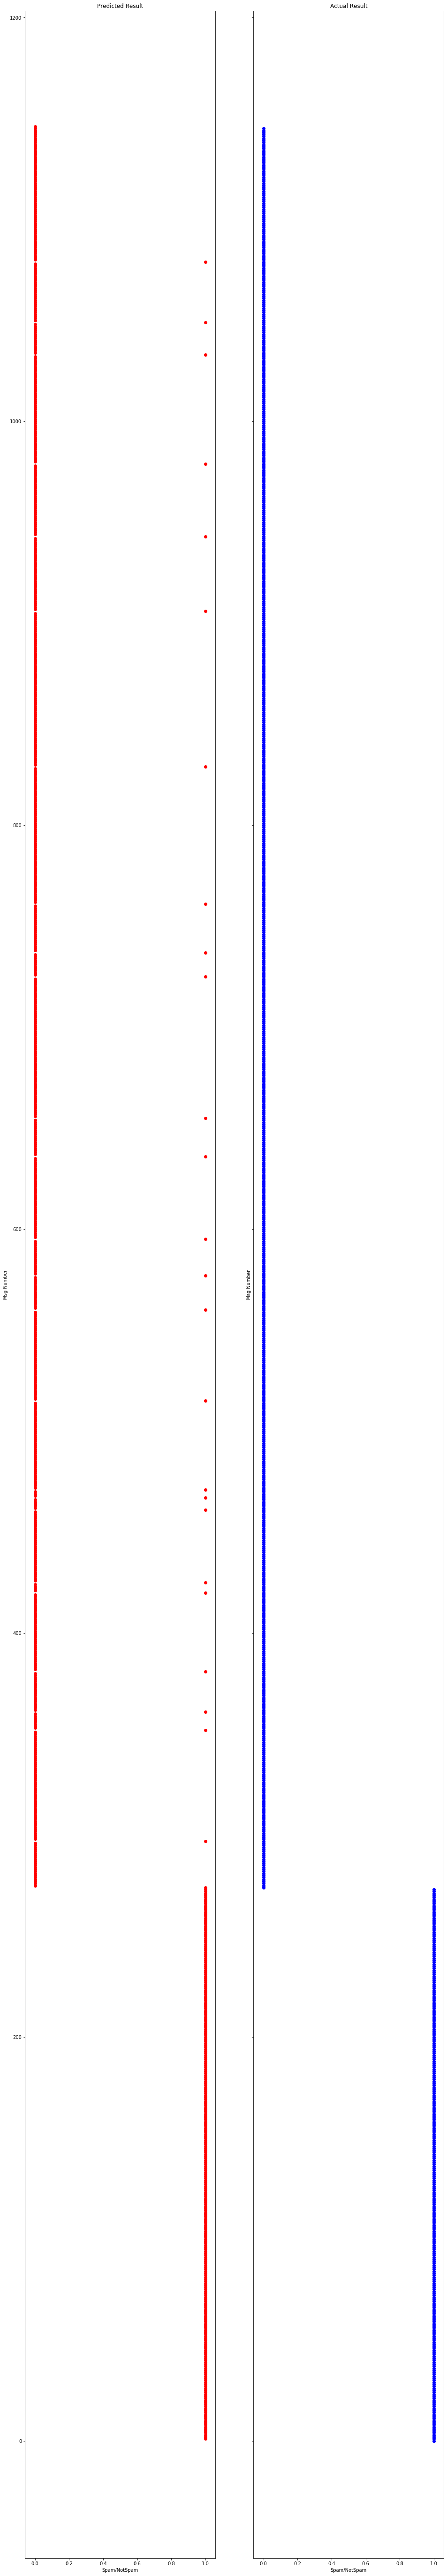

In [11]:
fig, arr = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(100)

arr[0].scatter (predicted_result['spam'],predicted_result['index'], c='r' )
arr[0].set_title('Predicted Result')
arr[0].set_xlabel('Spam/NotSpam')
arr[0].set_ylabel('Msg Number')

arr[1].scatter (test_data['spam'],test_data['index'], c='b' )
arr[1].set_title('Actual Result')
arr[1].set_xlabel('Spam/NotSpam')
arr[1].set_ylabel('Msg Number')

In [12]:
print(tota_mismatches)

25
